In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.naive_bayes import MultinomialNB

In [2]:
url = 'https://raw.githubusercontent.com/Cmgarces2/InterDataSets/main/EscenarioC/UNSW-NB15_4.csv'
df = pd.read_csv(url)

names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur',
        'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service',
        'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
        'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
        'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
        'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
        'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
        'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
        'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

df = pd.read_csv(url, names=names, low_memory=False)

In [3]:
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:, feature_name] = pd.to_numeric(df.loc[:, feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:, feature_name] = (df.loc[:, feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:, feature_name] = (df.loc[:, feature_name]- min_value)    
    return df

dataframe = pd.read_csv(url, names=names, low_memory=False)
dataframe = dataframe.reindex(np.random.permutation(dataframe.index)).copy()

In [4]:
keys = dataframe.keys()
data_to_process = dataframe[keys[4:len(keys)-1]].copy()
x_normalized = dfNormalize(data_to_process)

In [5]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalized, df['Label'], test_size=0.3, random_state=0)

In [6]:
# Define and train the SAE model
input_dim = x_train.shape[1]
encoding_dim = 50 # Number of neurons in the encoding layer
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
9626/9626 [==============================] - 8s 794us/step - loss: 0.1200 - val_loss: 0.1115
Epoch 2/10
9626/9626 [==============================] - 7s 779us/step - loss: 0.1113 - val_loss: 0.1111
Epoch 3/10
9626/9626 [==============================] - 8s 781us/step - loss: 0.1110 - val_loss: 0.1109
Epoch 4/10
9626/9626 [==============================] - 8s 783us/step - loss: 0.1109 - val_loss: 0.1108
Epoch 5/10
9626/9626 [==============================] - 8s 791us/step - loss: 0.1108 - val_loss: 0.1108
Epoch 6/10
9626/9626 [==============================] - 8s 790us/step - loss: 0.1108 - val_loss: 0.1107
Epoch 7/10
9626/9626 [==============================] - 8s 790us/step - loss: 0.1107 - val_loss: 0.1107
Epoch 8/10
9626/9626 [==============================] - 8s 790us/step - loss: 0.1106 - val_loss: 0.1106
Epoch 9/10
9626/9626 [==============================] - 8s 785us/step - loss: 0.1106 - val_loss: 0.1106
Epoch 10/10
9626/9626 [==============================] - 8s 788u

In [7]:
# Use the trained model to encode the data
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data_train = encoder_model.predict(x_train)
encoded_data_test = encoder_model.predict(x_test)

4126/4126 [==============================] - 2s 450us/step


In [8]:
# Perform clustering on the encoded data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(encoded_data_train)

KMeans(n_clusters=2, random_state=0)

In [9]:
# Predict the clusters on the encoded test data
predicted_clusters = kmeans.predict(encoded_data_test)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score

clf = MultinomialNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# Predict the labels using the Naive Bayes classifier
y_pred = clf.predict(x_test)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Print predicted labels
print(y_pred)
#Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print('METRICS FOR THE MODEL')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('F1-score:', f1)

[0 0 0 ... 0 0 0]
METRICS FOR THE MODEL
Accuracy: 0.797029102973927
Precision: 0.3985145514869635
F1-score: 0.4435259850020866


D:\Users\Equipo-PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


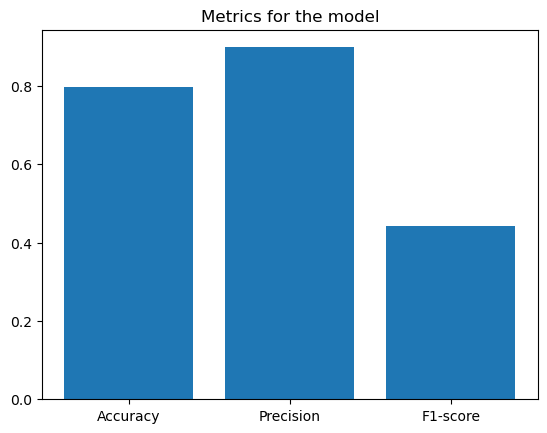

In [11]:
# Define las variables de las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro')

# Crea un gráfico de barras de las métricas
metric_names = ['Accuracy', 'Precision', 'F1-score']
metric_values = [accuracy, precision, f1]
plt.bar(metric_names, metric_values)
plt.title('Metrics for the model')
plt.show()

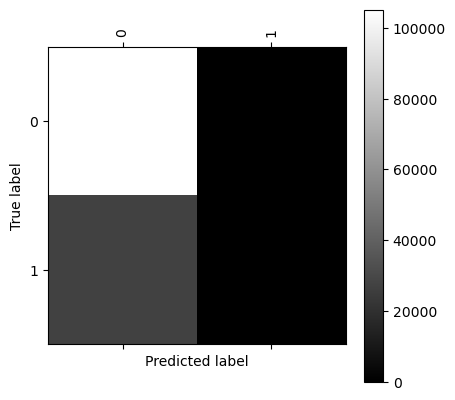

In [12]:
from sklearn.metrics import confusion_matrix

# Crea una matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crea un gráfico de matriz de confusión
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.xticks(range(len(conf_mat)), list(set(y_test)), rotation=90)
plt.yticks(range(len(conf_mat)), list(set(y_test)))
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()